In [12]:
import pandas as pd
import numpy as np
from sklearn import metrics
%matplotlib inline
import matplotlib.pyplot as plt


In [19]:
df=pd.read_csv("tesladata.csv")

In [20]:
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,16.110001


In [21]:
df["Date"]=pd.to_datetime(df.Date)

In [23]:
df.shape

(1692, 7)

In [25]:
df.drop('Adj Close',axis=1,inplace=True)

In [26]:
df.head()

,Date,Open,High,Low,Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,6866900


In [28]:
df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692 entries, 0 to 1691
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1692 non-null   datetime64[ns]
 1   Open    1692 non-null   float64       
 2   High    1692 non-null   float64       
 3   Low     1692 non-null   float64       
 4   Close   1692 non-null   float64       
 5   Volume  1692 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 79.4 KB


In [30]:
df.describe()

,Date,Open,High,Low,Close,Volume
count,1692,1692.000000,1692.000000,1692.000000,1692.000000,1.692000e+03
mean,2013-11-06 02:53:37.021276416,132.441572,134.769698,129.996223,132.428658,4.270741e+06
min,2010-06-29 00:00:00,16.139999,16.629999,14.980000,15.800000,1.185000e+05
25%,2012-03-01 18:00:00,30.000000,30.650000,29.215000,29.884999,1.194350e+06
50%,2013-11-05 12:00:00,156.334999,162.370002,153.150002,158.160004,3.180700e+06
75%,2015-07-14 06:00:00,220.557495,224.099999,217.119999,220.022503,5.662100e+06
max,2017-03-17 00:00:00,287.670013,291.420013,280.399994,286.040009,3.716390e+07
std,NaN,94.309923,95.694914,92.855227,94.313187,4.295971e+06


<Axes: >

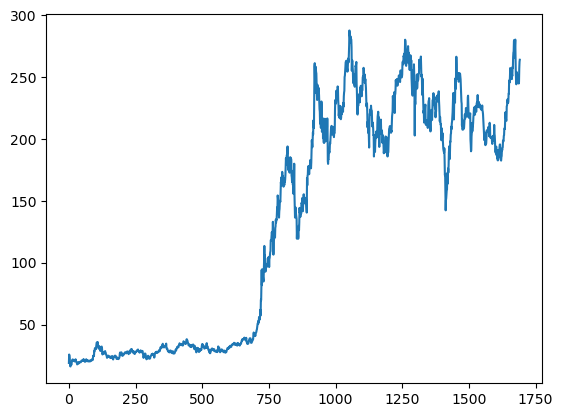

In [35]:
df['Open'].plot()

In [37]:
X=df[['Open','High','Low','Volume']]
Y=df['Close']

In [39]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [41]:
print(X_train.shape,X_test.shape)

(1353, 4) (339, 4)


In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
regression=LinearRegression()

In [43]:
regression.fit(X_train,Y_train)

LinearRegression()

In [44]:
predict=regression.predict(X_test)

In [45]:
print(X_test)

            Open        High         Low    Volume
124    31.260000   32.480000   29.920000   1552600
1688  246.110001  258.119995  246.020004   7575500
1397  198.970001  205.070007  197.250000   5322200
6      16.139999   17.520000   15.570000   7711400
1279  264.269989  267.890015  262.000000   2790100
...          ...         ...         ...       ...
831   184.899994  187.300003  182.089996   8205400
1470  241.500000  243.190002  234.820007   3843900
795   165.149994  173.000000  160.250000  24171100
554    28.549999   29.570000   28.500000    953200
1366  231.059998  238.000000  231.050003   3734000

[339 rows x 4 columns]


In [50]:
test=pd.DataFrame(Y_test,predict)


In [52]:
comp=pd.DataFrame({'Actual':Y_test,'Predicted':predict})

In [53]:
print(comp)

          Actual   Predicted
124    30.090000   31.286019
1688  258.000000  255.833139
1397  204.990005  202.604123
6      17.459999   16.631611
1279  263.820007  265.432417
...          ...         ...
831   183.559998  184.494787
1470  241.800003  237.835078
795   164.220001  167.310263
554    29.350000   29.354180
1366  237.190002  236.669303

[339 rows x 2 columns]


In [54]:
from sklearn.metrics import accuracy_score

In [56]:
regression.score(X_test,Y_test)

0.9997086384917152

In [57]:
print("MSE",metrics.mean_squared_error(Y_test,predict))

MSE 2.6468522887800603
